Jiayue Meng

Problem 1

(1) Create a time series of the plot of the data provided.

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as st
from statsmodels.tsa.stattools import acf, pacf

# import data for problem 1
p1_df = pd.read_csv('C:/Users/Joyce/Desktop/DSC 275/Project 1/Problem1_DataSet.csv',header = 0)
p1_df['Month'] = pd.to_datetime(p1_df['Month'],dayfirst = True)
#p1_df = p1_df.set_index('Month')

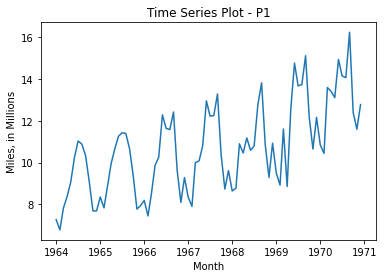

In [152]:
# draw the time series plot
#plt.plot(p1_df['Miles, in Millions'])
plt.plot(p1_df['Month'],p1_df['Miles, in Millions'])
plt.xlabel ('Month')
plt.ylabel ('Miles, in Millions')
plt.title('Time Series Plot - P1')
plt.show()

(2) Plot the autocorrelation function (ACF). From the ACF, what is the seasonal period?

The seasonal period is 12 lags. 

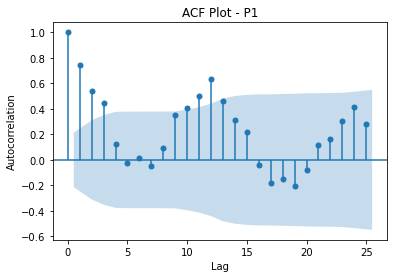

In [153]:
# Draw ACF Plot
st.plot_acf(p1_df['Miles, in Millions'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - P1')
plt.show()

(3) Compute a moving average for the data to determine the trend in the data and overlay on the original time-series plot. What is a suitable choice for the moving average window length?
<br>
<br>
A suitable choice for the moving average window length is 12 lags because the seasonal period is 12 lags. 

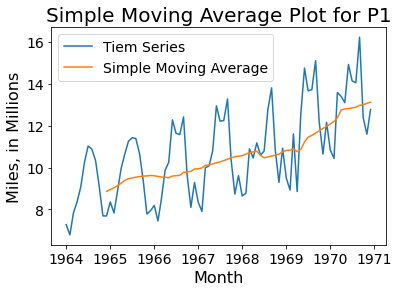

In [154]:
# add a new column to p1_df as the simple moving average
p1_df['SMA'] = p1_df['Miles, in Millions'].rolling(12, min_periods=12).mean()

# plot original data and SMA
plt.plot(p1_df['Month'],p1_df['Miles, in Millions'])
plt.plot(p1_df['Month'],p1_df['SMA'])

# title and labels
plt.title('Simple Moving Average Plot for P1', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Miles, in Millions', fontsize=16)

# change the ticks' size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Tiem Series', 'Simple Moving Average'], fontsize=14)
plt.show()

(4) Observing the moving average plot in Q3, is the trend line increasing or decreasing?

We can see from the plot above that the trend line is increasing.

(5) Compute the first difference of the data and plot the ACF and PACF for the differenced data. What are the significant lags based on the ACF and PACF?

Based on ACF, the significant lags are lag 2, 3, 4, 5, 7, 9, 12, and 24. Based on PACF, the significant lags are lag 2, 3, 4, 5, 7, 8, 11, 20, and 22.

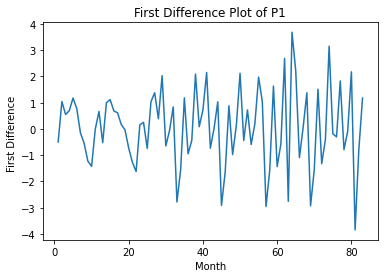

In [155]:
from statsmodels.tsa.statespace.tools import diff
# Compute the first difference of the data
p1_diff = diff(p1_df['Miles, in Millions'])

# Draw the first difference plot
p1_diff.plot()
plt.xlabel('Month')
plt.ylabel('First Difference ')
plt.title('First Difference Plot of P1')
plt.show()

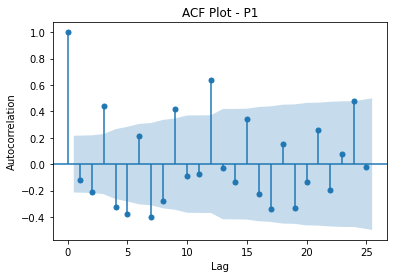

In [156]:
# Draw ACF Plot
st.plot_acf(p1_diff, lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - P1')
plt.show()


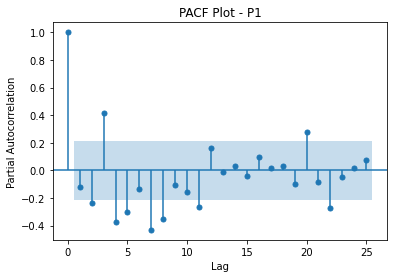

In [157]:
# Draw PACF Plot
st.plot_pacf(p1_diff, lags=25, method = 'ywmle')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation') 
plt.title('PACF Plot - P1')
plt.show()

(6) Using the output from Q5 above, perform a first seasonal difference with the seasonal period you identified in Q2, and plot the ACF and PACF again. What are the significant lags based on the ACF and PACF? 

In the ACF, the significant lags are lag 1, 2, 10, and 12. In the PACF, the significant lags are lag 1, 2, 4, 8, 10, and 11.

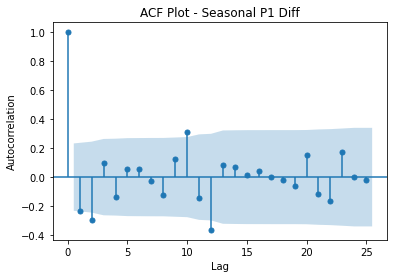

In [158]:
# Perform a first seasonal difference with the seasonal period = 12 
seasonal_p1_diff = diff(p1_diff, k_diff=0, k_seasonal_diff=1, seasonal_periods=12)

# Draw ACF Plot
st.plot_acf(seasonal_p1_diff, lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - Seasonal P1 Diff')
plt.show()

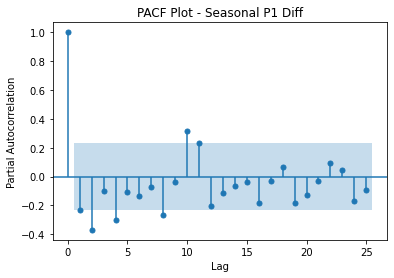

In [159]:
# Draw PACF Plot
st.plot_pacf(seasonal_p1_diff, lags=25, method = 'ywmle')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation') 
plt.title('PACF Plot - Seasonal P1 Diff')
plt.show()

(7) Develop a suitable SARIMA model that can be applied on the time series. Use the first 6 years of data only to develop the model.

a.	To develop the model, vary the model parameters for the non-seasonal (p,d,q) and seasonal components (P,D,Q) and calculate the output for each combination of parameters.

In [160]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product
p1_df_6y = p1_df['Miles, in Millions'].iloc[0:72]

In [161]:
per = product([0,1,2,3], repeat = 4)
min_aic = 99999 # set minimun aic as an impossible large number
best_par = [-5,-5,-5,-5] # set the best parameters as an impossible combination 
# set d, D = 1 for shorter running time
d = 1
D = 1

In [162]:
for [p,q,P,Q] in per:
    try:
        model = SARIMAX(p1_df_6y, order = (p,d,q), seasonal_order = (P,D,Q,12), trend = 'c').fit() # build the SARIMA model and fit
        AIC = model.aic # get aic for each combination 
        print(model,'p = ',p, ' d = ',d, ' q = ',q, ' P = ', P, ' D = ',D, ' Q = ',Q, 'AIC = ', AIC)
        if (AIC < min_aic):
            min_aic = AIC # is AIC is smaller than the min_aic set before, replace min_aic to AIC
            best_par = [p,q,P,Q] # replace the best parameter combination to the one which has the smallest AIC
    except:
        continue

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B75DDC10> p =  0  d =  1  q =  0  P =  0  D =  1  Q =  0 AIC =  168.90175318683936
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B280> p =  0  d =  1  q =  0  P =  0  D =  1  Q =  1 AIC =  167.60087185621012
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B61DB730> p =  0  d =  1  q =  0  P =  0  D =  1  Q =  2 AIC =  168.99486274053
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25C10> p =  0  d =  1  q =  0  P =  0  D =  1  Q =  3 AIC =  170.78274165692932
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4F5A6D0> p =  0  d =  1  q =  0  P =  1  D =  1  Q =  0 AIC =  167.32580089868807
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77DDD00> p =  0  d =  1  q =  0  P =  1  D =  1  Q =  1 AIC =  169.32008617474378
<statsmodels.tsa.statespace.sarimax.S

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D76B80> p =  0  d =  1  q =  0  P =  2  D =  1  Q =  1 AIC =  170.87996995624238
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7657EE0> p =  0  d =  1  q =  0  P =  2  D =  1  Q =  2 AIC =  172.53113935563655
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A56C40> p =  0  d =  1  q =  0  P =  2  D =  1  Q =  3 AIC =  174.5311380780461
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B529AE20> p =  0  d =  1  q =  0  P =  3  D =  1  Q =  0 AIC =  170.56889574439074
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B51F1E20> p =  0  d =  1  q =  0  P =  3  D =  1  Q =  1 AIC =  172.53113820595027
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4C15610> p =  0  d =  1  q =  0  P =  3  D =  1  Q =  2 AIC =  174.53113803426615
<statsmodels.tsa.statespace.sarimax

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77CF520> p =  0  d =  1  q =  1  P =  1  D =  1  Q =  3 AIC =  159.4256914977421
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B35995E0> p =  0  d =  1  q =  1  P =  2  D =  1  Q =  0 AIC =  155.55243725516635
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E580> p =  0  d =  1  q =  1  P =  2  D =  1  Q =  1 AIC =  157.35211252460024


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B040> p =  0  d =  1  q =  1  P =  2  D =  1  Q =  2 AIC =  159.34939710758474
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65FA0> p =  0  d =  1  q =  1  P =  2  D =  1  Q =  3 AIC =  161.34937526140592
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E640> p =  0  d =  1  q =  1  P =  3  D =  1  Q =  0 AIC =  157.38027444108644
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65C40> p =  0  d =  1  q =  1  P =  3  D =  1  Q =  1 AIC =  159.3494246355054
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77DDBE0> p =  0  d =  1  q =  1  P =  3  D =  1  Q =  2 AIC =  161.34937444497334
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25040> p =  0  d =  1  q =  1  P =  3  D =  1  Q =  3 AIC =  163.34937470406734
<statsmodels.tsa.statespace.sarimax

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65130> p =  0  d =  1  q =  2  P =  0  D =  1  Q =  3 AIC =  154.04102634162766
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E640> p =  0  d =  1  q =  2  P =  1  D =  1  Q =  0 AIC =  150.07416957592002
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B040> p =  0  d =  1  q =  2  P =  1  D =  1  Q =  1 AIC =  152.06853569625832


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A4F4F0> p =  0  d =  1  q =  2  P =  1  D =  1  Q =  2 AIC =  154.04767172549055


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E5E0> p =  0  d =  1  q =  2  P =  1  D =  1  Q =  3 AIC =  156.0308461388276
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25BB0> p =  0  d =  1  q =  2  P =  2  D =  1  Q =  0 AIC =  152.06722836808913


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25C10> p =  0  d =  1  q =  2  P =  2  D =  1  Q =  1 AIC =  153.97687417290098


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5297A60> p =  0  d =  1  q =  2  P =  2  D =  1  Q =  2 AIC =  155.96452188169678


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B51F1FD0> p =  0  d =  1  q =  2  P =  2  D =  1  Q =  3 AIC =  157.93854398389007


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25B80> p =  0  d =  1  q =  2  P =  3  D =  1  Q =  0 AIC =  154.00445201360108


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65DC0> p =  0  d =  1  q =  2  P =  3  D =  1  Q =  1 AIC =  155.934698985563


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B070> p =  0  d =  1  q =  2  P =  3  D =  1  Q =  2 AIC =  157.9657934368736


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65C10> p =  0  d =  1  q =  2  P =  3  D =  1  Q =  3 AIC =  159.91742122817163
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77CF520> p =  0  d =  1  q =  3  P =  0  D =  1  Q =  0 AIC =  153.36149706548338
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25C10> p =  0  d =  1  q =  3  P =  0  D =  1  Q =  1 AIC =  151.88531263641977
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65E80> p =  0  d =  1  q =  3  P =  0  D =  1  Q =  2 AIC =  153.75560058745467
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E550> p =  0  d =  1  q =  3  P =  0  D =  1  Q =  3 AIC =  155.66697114926478
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B35995E0> p =  0  d =  1  q =  3  P =  1  D =  1  Q =  0 AIC =  151.56128078524668


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65430> p =  0  d =  1  q =  3  P =  1  D =  1  Q =  1 AIC =  153.54871104758016
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B529A4F0> p =  0  d =  1  q =  3  P =  1  D =  1  Q =  2 AIC =  155.7335682439121


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77E72B0> p =  0  d =  1  q =  3  P =  1  D =  1  Q =  3 AIC =  157.46646611273914
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25A30> p =  0  d =  1  q =  3  P =  2  D =  1  Q =  0 AIC =  153.72865515834323


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B040> p =  0  d =  1  q =  3  P =  2  D =  1  Q =  1 AIC =  155.5881412650672
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A4F4F0> p =  0  d =  1  q =  3  P =  2  D =  1  Q =  2 AIC =  157.73379799618002


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25910> p =  0  d =  1  q =  3  P =  2  D =  1  Q =  3 AIC =  159.44576921161558
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B62E5430> p =  0  d =  1  q =  3  P =  3  D =  1  Q =  0 AIC =  155.71690412405505


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E490> p =  0  d =  1  q =  3  P =  3  D =  1  Q =  1 AIC =  157.58116054961002


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65D30> p =  0  d =  1  q =  3  P =  3  D =  1  Q =  2 AIC =  159.5549320324031


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B2B0> p =  0  d =  1  q =  3  P =  3  D =  1  Q =  3 AIC =  161.36431268272057
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B760> p =  1  d =  1  q =  0  P =  0  D =  1  Q =  0 AIC =  169.19491222316702
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65AC0> p =  1  d =  1  q =  0  P =  0  D =  1  Q =  1 AIC =  165.7667184372175
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BA00> p =  1  d =  1  q =  0  P =  0  D =  1  Q =  2 AIC =  166.71525816950333
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A254F0> p =  1  d =  1  q =  0  P =  0  D =  1  Q =  3 AIC =  168.5815606810908
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BC40> p =  1  d =  1  q =  0  P =  1  D =  1  Q =  0 AIC =  165.28728942005526
<statsmodels.tsa.statespace.sarimax.

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65EE0> p =  1  d =  1  q =  0  P =  1  D =  1  Q =  3 AIC =  170.39471327400406
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BC40> p =  1  d =  1  q =  0  P =  2  D =  1  Q =  0 AIC =  167.10754819697485
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A9E070> p =  1  d =  1  q =  0  P =  2  D =  1  Q =  1 AIC =  168.62328665228043
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BD60> p =  1  d =  1  q =  0  P =  2  D =  1  Q =  2 AIC =  170.39454345908044
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77DDCD0> p =  1  d =  1  q =  0  P =  2  D =  1  Q =  3 AIC =  172.39457103609362
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BA30> p =  1  d =  1  q =  0  P =  3  D =  1  Q =  0 AIC =  168.39559842971633
<statsmodels.tsa.statespace.sarima

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5197E50> p =  1  d =  1  q =  1  P =  0  D =  1  Q =  3 AIC =  155.74500621393886
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25760> p =  1  d =  1  q =  1  P =  1  D =  1  Q =  0 AIC =  152.08673475284857


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BA30> p =  1  d =  1  q =  1  P =  1  D =  1  Q =  1 AIC =  157.92053281102164
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B520> p =  1  d =  1  q =  1  P =  1  D =  1  Q =  2 AIC =  155.75462182040343


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BF40> p =  1  d =  1  q =  1  P =  1  D =  1  Q =  3 AIC =  157.70143033180995
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65580> p =  1  d =  1  q =  1  P =  2  D =  1  Q =  0 AIC =  154.01318603996373


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A4F4F0> p =  1  d =  1  q =  1  P =  2  D =  1  Q =  1 AIC =  155.78366995420777
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7930A90> p =  1  d =  1  q =  1  P =  2  D =  1  Q =  2 AIC =  157.70692372801332


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65F40> p =  1  d =  1  q =  1  P =  2  D =  1  Q =  3 AIC =  159.7538485388102


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BC70> p =  1  d =  1  q =  1  P =  3  D =  1  Q =  0 AIC =  155.6977483579198


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4F4A730> p =  1  d =  1  q =  1  P =  3  D =  1  Q =  1 AIC =  157.7510541818297
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A656A0> p =  1  d =  1  q =  1  P =  3  D =  1  Q =  2 AIC =  159.6814318337259


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BAC0> p =  1  d =  1  q =  1  P =  3  D =  1  Q =  3 AIC =  161.69381823318386
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5297A60> p =  1  d =  1  q =  2  P =  0  D =  1  Q =  0 AIC =  153.33902689711627
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A653A0> p =  1  d =  1  q =  2  P =  0  D =  1  Q =  1 AIC =  151.63063355451484
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A656D0> p =  1  d =  1  q =  2  P =  0  D =  1  Q =  2 AIC =  153.45143680612395


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7657EE0> p =  1  d =  1  q =  2  P =  0  D =  1  Q =  3 AIC =  155.2355923480025
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B3A2B940> p =  1  d =  1  q =  2  P =  1  D =  1  Q =  0 AIC =  151.30134656481644


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BDF0> p =  1  d =  1  q =  2  P =  1  D =  1  Q =  1 AIC =  153.27866772233048
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25730> p =  1  d =  1  q =  2  P =  1  D =  1  Q =  2 AIC =  155.42032491458815


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B130> p =  1  d =  1  q =  2  P =  1  D =  1  Q =  3 AIC =  157.20197757049652
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25730> p =  1  d =  1  q =  2  P =  2  D =  1  Q =  0 AIC =  153.41615686242613


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65430> p =  1  d =  1  q =  2  P =  2  D =  1  Q =  1 AIC =  155.29257999292653


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FC99D0> p =  1  d =  1  q =  2  P =  2  D =  1  Q =  2 AIC =  157.29084961281958


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65F10> p =  1  d =  1  q =  2  P =  2  D =  1  Q =  3 AIC =  159.1710220565393
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65D60> p =  1  d =  1  q =  2  P =  3  D =  1  Q =  0 AIC =  155.40584139495652


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5197E50> p =  1  d =  1  q =  2  P =  3  D =  1  Q =  1 AIC =  157.28184160839655


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B0D0> p =  1  d =  1  q =  2  P =  3  D =  1  Q =  2 AIC =  159.2277627414457


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BE50> p =  1  d =  1  q =  2  P =  3  D =  1  Q =  3 AIC =  161.09948656047976
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65CA0> p =  1  d =  1  q =  3  P =  0  D =  1  Q =  0 AIC =  153.88699501545744


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5197E50> p =  1  d =  1  q =  3  P =  0  D =  1  Q =  1 AIC =  153.51819711279848
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65A90> p =  1  d =  1  q =  3  P =  0  D =  1  Q =  2 AIC =  155.2377581588253


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37190> p =  1  d =  1  q =  3  P =  0  D =  1  Q =  3 AIC =  157.168956035996
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65A90> p =  1  d =  1  q =  3  P =  1  D =  1  Q =  0 AIC =  153.22768234930368


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A251F0> p =  1  d =  1  q =  3  P =  1  D =  1  Q =  1 AIC =  157.09222910996078


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65EE0> p =  1  d =  1  q =  3  P =  1  D =  1  Q =  2 AIC =  157.20478057496555


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B8B0> p =  1  d =  1  q =  3  P =  1  D =  1  Q =  3 AIC =  159.16558461968376
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4F4A730> p =  1  d =  1  q =  3  P =  2  D =  1  Q =  0 AIC =  155.2048320089418


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65EE0> p =  1  d =  1  q =  3  P =  2  D =  1  Q =  1 AIC =  157.15302132679165


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BA00> p =  1  d =  1  q =  3  P =  2  D =  1  Q =  2 AIC =  159.1931125846909


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37820> p =  1  d =  1  q =  3  P =  2  D =  1  Q =  3 AIC =  161.09336379480297


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BB20> p =  1  d =  1  q =  3  P =  3  D =  1  Q =  0 AIC =  157.19611572966494


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37C70> p =  1  d =  1  q =  3  P =  3  D =  1  Q =  1 AIC =  159.15153720900577


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B370> p =  1  d =  1  q =  3  P =  3  D =  1  Q =  2 AIC =  161.14654429359626


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A371F0> p =  1  d =  1  q =  3  P =  3  D =  1  Q =  3 AIC =  163.1532862698894
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25550> p =  2  d =  1  q =  0  P =  0  D =  1  Q =  0 AIC =  159.6004925323413
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50A90> p =  2  d =  1  q =  0  P =  0  D =  1  Q =  1 AIC =  156.09327104913655
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B370> p =  2  d =  1  q =  0  P =  0  D =  1  Q =  2 AIC =  158.07141808810843
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37760> p =  2  d =  1  q =  0  P =  0  D =  1  Q =  3 AIC =  160.0697679695987
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25760> p =  2  d =  1  q =  0  P =  1  D =  1  Q =  0 AIC =  156.80476208729942
<statsmodels.tsa.statespace.sarimax.S

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50D30> p =  2  d =  1  q =  0  P =  1  D =  1  Q =  3 AIC =  161.94515851747238
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50DF0> p =  2  d =  1  q =  0  P =  2  D =  1  Q =  0 AIC =  158.0638239758346
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50940> p =  2  d =  1  q =  0  P =  2  D =  1  Q =  1 AIC =  160.06243414867495


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1E20> p =  2  d =  1  q =  0  P =  2  D =  1  Q =  2 AIC =  161.92131993135303


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B640> p =  2  d =  1  q =  0  P =  2  D =  1  Q =  3 AIC =  163.83554171919712
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1910> p =  2  d =  1  q =  0  P =  3  D =  1  Q =  0 AIC =  160.06353668795896


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BF70> p =  2  d =  1  q =  0  P =  3  D =  1  Q =  1 AIC =  162.01338546156126
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4F4A730> p =  2  d =  1  q =  0  P =  3  D =  1  Q =  2 AIC =  163.82437753874595
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B7F0> p =  2  d =  1  q =  0  P =  3  D =  1  Q =  3 AIC =  165.82566563826026
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B8B0> p =  2  d =  1  q =  1  P =  0  D =  1  Q =  0 AIC =  157.56100303777959
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B77CF520> p =  2  d =  1  q =  1  P =  0  D =  1  Q =  1 AIC =  154.55492195950097


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1FA0> p =  2  d =  1  q =  1  P =  0  D =  1  Q =  2 AIC =  155.51264616686805


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1820> p =  2  d =  1  q =  1  P =  0  D =  1  Q =  3 AIC =  157.51534349477305
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37E20> p =  2  d =  1  q =  1  P =  1  D =  1  Q =  0 AIC =  153.74647137685537


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65F10> p =  2  d =  1  q =  1  P =  1  D =  1  Q =  1 AIC =  155.77575227033986


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65430> p =  2  d =  1  q =  1  P =  1  D =  1  Q =  2 AIC =  157.53594174629194


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5297A60> p =  2  d =  1  q =  1  P =  1  D =  1  Q =  3 AIC =  159.4776953862025
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65EE0> p =  2  d =  1  q =  1  P =  2  D =  1  Q =  0 AIC =  155.71723054955882


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50970> p =  2  d =  1  q =  1  P =  2  D =  1  Q =  1 AIC =  157.5458112732019


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B9D0> p =  2  d =  1  q =  1  P =  2  D =  1  Q =  2 AIC =  159.48612444507663


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B4F0> p =  2  d =  1  q =  1  P =  2  D =  1  Q =  3 AIC =  161.52724281481548


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BD90> p =  2  d =  1  q =  1  P =  3  D =  1  Q =  0 AIC =  157.46373816102596
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B4F0> p =  2  d =  1  q =  1  P =  3  D =  1  Q =  1 AIC =  159.7762833299193


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25760> p =  2  d =  1  q =  1  P =  3  D =  1  Q =  2 AIC =  161.4775829387051


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A506A0> p =  2  d =  1  q =  1  P =  3  D =  1  Q =  3 AIC =  163.77085250227142
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49160> p =  2  d =  1  q =  2  P =  0  D =  1  Q =  0 AIC =  155.18246431315112
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49D60> p =  2  d =  1  q =  2  P =  0  D =  1  Q =  1 AIC =  153.6303061882751


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B62E5430> p =  2  d =  1  q =  2  P =  0  D =  1  Q =  2 AIC =  155.09913657507158


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D494F0> p =  2  d =  1  q =  2  P =  0  D =  1  Q =  3 AIC =  157.05795370115132
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37EB0> p =  2  d =  1  q =  2  P =  1  D =  1  Q =  0 AIC =  153.1094044806538


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A507C0> p =  2  d =  1  q =  2  P =  1  D =  1  Q =  1 AIC =  155.0899779072312


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B310> p =  2  d =  1  q =  2  P =  1  D =  1  Q =  2 AIC =  157.07753317302547


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BB20> p =  2  d =  1  q =  2  P =  1  D =  1  Q =  3 AIC =  159.01333248936027


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB11F0> p =  2  d =  1  q =  2  P =  2  D =  1  Q =  0 AIC =  155.08734780876068


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1DC0> p =  2  d =  1  q =  2  P =  2  D =  1  Q =  1 AIC =  157.01316551856428


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37610> p =  2  d =  1  q =  2  P =  2  D =  1  Q =  2 AIC =  159.04737701086637


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789C460> p =  2  d =  1  q =  2  P =  2  D =  1  Q =  3 AIC =  160.99526258919323


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49FD0> p =  2  d =  1  q =  2  P =  3  D =  1  Q =  0 AIC =  157.0616770044321


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49190> p =  2  d =  1  q =  2  P =  3  D =  1  Q =  1 AIC =  159.00070844075327


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789CC70> p =  2  d =  1  q =  2  P =  3  D =  1  Q =  2 AIC =  161.03179064515686


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50C70> p =  2  d =  1  q =  2  P =  3  D =  1  Q =  3 AIC =  163.09771298326655


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789CCA0> p =  2  d =  1  q =  3  P =  0  D =  1  Q =  0 AIC =  154.30737575884592


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1F70> p =  2  d =  1  q =  3  P =  0  D =  1  Q =  1 AIC =  149.8233463178564


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B040> p =  2  d =  1  q =  3  P =  0  D =  1  Q =  2 AIC =  151.62037169712596


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A37C70> p =  2  d =  1  q =  3  P =  0  D =  1  Q =  3 AIC =  153.15985524241069


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8B640> p =  2  d =  1  q =  3  P =  1  D =  1  Q =  0 AIC =  149.35168449390775


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB11F0> p =  2  d =  1  q =  3  P =  1  D =  1  Q =  1 AIC =  155.92180425864322


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B9A0> p =  2  d =  1  q =  3  P =  1  D =  1  Q =  2 AIC =  153.35239921903607


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50F70> p =  2  d =  1  q =  3  P =  1  D =  1  Q =  3 AIC =  155.18691210865944


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7BD30> p =  2  d =  1  q =  3  P =  2  D =  1  Q =  0 AIC =  151.35306527033856


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1BB0> p =  2  d =  1  q =  3  P =  2  D =  1  Q =  1 AIC =  153.35056164342356


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49580> p =  2  d =  1  q =  3  P =  2  D =  1  Q =  2 AIC =  155.34845713876666


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A65E50> p =  2  d =  1  q =  3  P =  2  D =  1  Q =  3 AIC =  157.01559553082438


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB18B0> p =  2  d =  1  q =  3  P =  3  D =  1  Q =  0 AIC =  153.3522971919505


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49D60> p =  2  d =  1  q =  3  P =  3  D =  1  Q =  1 AIC =  154.52422509123974


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1E80> p =  2  d =  1  q =  3  P =  3  D =  1  Q =  2 AIC =  157.31021823587557


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D491C0> p =  2  d =  1  q =  3  P =  3  D =  1  Q =  3 AIC =  158.74228414629738
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB12E0> p =  3  d =  1  q =  0  P =  0  D =  1  Q =  0 AIC =  161.55112085066943
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A7B340> p =  3  d =  1  q =  0  P =  0  D =  1  Q =  1 AIC =  158.0882341356232
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49CA0> p =  3  d =  1  q =  0  P =  0  D =  1  Q =  2 AIC =  160.06903525446847
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FB1D60> p =  3  d =  1  q =  0  P =  0  D =  1  Q =  3 AIC =  162.06646945753917
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50D90> p =  3  d =  1  q =  0  P =  1  D =  1  Q =  0 AIC =  158.78287369618113
<statsmodels.tsa.statespace.sarimax

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A8BB20> p =  3  d =  1  q =  0  P =  1  D =  1  Q =  3 AIC =  163.94451343942671
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A563D0> p =  3  d =  1  q =  0  P =  2  D =  1  Q =  0 AIC =  160.06270134812726
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D49070> p =  3  d =  1  q =  0  P =  2  D =  1  Q =  1 AIC =  162.0621987199532


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A50F40> p =  3  d =  1  q =  0  P =  2  D =  1  Q =  2 AIC =  163.92110839890717


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB09A0> p =  3  d =  1  q =  0  P =  2  D =  1  Q =  3 AIC =  165.834083906502
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB0F10> p =  3  d =  1  q =  0  P =  3  D =  1  Q =  0 AIC =  162.06261670891303


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4F705B0> p =  3  d =  1  q =  0  P =  3  D =  1  Q =  1 AIC =  164.01012259464855


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB0850> p =  3  d =  1  q =  0  P =  3  D =  1  Q =  2 AIC =  165.81960393497567
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789C460> p =  3  d =  1  q =  0  P =  3  D =  1  Q =  3 AIC =  167.82095442129446
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB08E0> p =  3  d =  1  q =  1  P =  0  D =  1  Q =  0 AIC =  156.53534806942253


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB07C0> p =  3  d =  1  q =  1  P =  0  D =  1  Q =  1 AIC =  153.822740451637


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789C490> p =  3  d =  1  q =  1  P =  0  D =  1  Q =  2 AIC =  155.5913680413495


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B789C430> p =  3  d =  1  q =  1  P =  0  D =  1  Q =  3 AIC =  157.58902318957513


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25A30> p =  3  d =  1  q =  1  P =  1  D =  1  Q =  0 AIC =  153.78269628653757


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FCEB50> p =  3  d =  1  q =  1  P =  1  D =  1  Q =  1 AIC =  160.1434332300692


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245BBBB0D30> p =  3  d =  1  q =  1  P =  1  D =  1  Q =  2 AIC =  157.59765299855184


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FCE820> p =  3  d =  1  q =  1  P =  1  D =  1  Q =  3 AIC =  159.53732513900113


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A563D0> p =  3  d =  1  q =  1  P =  2  D =  1  Q =  0 AIC =  155.57888255282023


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FCE430> p =  3  d =  1  q =  1  P =  2  D =  1  Q =  1 AIC =  157.48195502544732


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B5FCED00> p =  3  d =  1  q =  1  P =  2  D =  1  Q =  2 AIC =  159.49966276861431


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038220> p =  3  d =  1  q =  1  P =  2  D =  1  Q =  3 AIC =  161.6470819968564


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B51F1FD0> p =  3  d =  1  q =  1  P =  3  D =  1  Q =  0 AIC =  157.54516543449233


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038460> p =  3  d =  1  q =  1  P =  3  D =  1  Q =  1 AIC =  159.47035358290034


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25700> p =  3  d =  1  q =  1  P =  3  D =  1  Q =  2 AIC =  161.46225043865496


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B070> p =  3  d =  1  q =  1  P =  3  D =  1  Q =  3 AIC =  163.76471075039007


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25DC0> p =  3  d =  1  q =  2  P =  0  D =  1  Q =  0 AIC =  156.17179451801678


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C5B0> p =  3  d =  1  q =  2  P =  0  D =  1  Q =  1 AIC =  153.70691400536546


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25BB0> p =  3  d =  1  q =  2  P =  0  D =  1  Q =  2 AIC =  155.604217249519


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C5B0> p =  3  d =  1  q =  2  P =  0  D =  1  Q =  3 AIC =  157.55747647993516


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B4C42370> p =  3  d =  1  q =  2  P =  1  D =  1  Q =  0 AIC =  153.78063414817714


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9CEB0> p =  3  d =  1  q =  2  P =  1  D =  1  Q =  1 AIC =  159.58030833066334


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038D30> p =  3  d =  1  q =  2  P =  1  D =  1  Q =  2 AIC =  157.57970684668706


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B75115E0> p =  3  d =  1  q =  2  P =  1  D =  1  Q =  3 AIC =  159.54079627032792


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B60386D0> p =  3  d =  1  q =  2  P =  2  D =  1  Q =  0 AIC =  155.58699456866347


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038220> p =  3  d =  1  q =  2  P =  2  D =  1  Q =  1 AIC =  157.57684468356925


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038D30> p =  3  d =  1  q =  2  P =  2  D =  1  Q =  2 AIC =  159.58043364657306


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038220> p =  3  d =  1  q =  2  P =  2  D =  1  Q =  3 AIC =  161.4160048881848


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A251F0> p =  3  d =  1  q =  2  P =  3  D =  1  Q =  0 AIC =  157.5868420247852


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25970> p =  3  d =  1  q =  2  P =  3  D =  1  Q =  1 AIC =  159.54212582646213


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C6A0> p =  3  d =  1  q =  2  P =  3  D =  1  Q =  2 AIC =  161.4821120324562


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25250> p =  3  d =  1  q =  2  P =  3  D =  1  Q =  3 AIC =  163.5742425878768


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C2E0> p =  3  d =  1  q =  3  P =  0  D =  1  Q =  0 AIC =  154.14527185871697


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B51F1550> p =  3  d =  1  q =  3  P =  0  D =  1  Q =  1 AIC =  151.30505020518783


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C2E0> p =  3  d =  1  q =  3  P =  0  D =  1  Q =  2 AIC =  152.5936447867817


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A254C0> p =  3  d =  1  q =  3  P =  0  D =  1  Q =  3 AIC =  154.39594364494707


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9C2E0> p =  3  d =  1  q =  3  P =  1  D =  1  Q =  0 AIC =  151.0701979959632


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A256A0> p =  3  d =  1  q =  3  P =  1  D =  1  Q =  1 AIC =  157.10438823866116


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25A30> p =  3  d =  1  q =  3  P =  1  D =  1  Q =  2 AIC =  154.54531351074831


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7D9CD60> p =  3  d =  1  q =  3  P =  1  D =  1  Q =  3 AIC =  156.84130651492072


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25C70> p =  3  d =  1  q =  3  P =  2  D =  1  Q =  0 AIC =  153.0893821886366


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B75110A0> p =  3  d =  1  q =  3  P =  2  D =  1  Q =  1 AIC =  154.49347995482967


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A256D0> p =  3  d =  1  q =  3  P =  2  D =  1  Q =  2 AIC =  157.2136587706361


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25D30> p =  3  d =  1  q =  3  P =  2  D =  1  Q =  3 AIC =  158.44723592517835


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A25640> p =  3  d =  1  q =  3  P =  3  D =  1  Q =  0 AIC =  154.51013813851796


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B6038040> p =  3  d =  1  q =  3  P =  3  D =  1  Q =  1 AIC =  156.19914624780904


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B7A252E0> p =  3  d =  1  q =  3  P =  3  D =  1  Q =  2 AIC =  159.13031726664616
<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000245B353B040> p =  3  d =  1  q =  3  P =  3  D =  1  Q =  3 AIC =  162.09823031542035


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(b) Use an evaluation criteria such as AIC, BIC or sum squared error or mean squared error to determine the best choice of parameters (p,d,q,P,D,Q). Note: AIC and BIC are metrics that is readily output by the ARIMA model. 

I used AIC as evaluation criterias. When AIC is smallest, I chose the best choice of parameters, which is SARIMA(2, 1, 3)(1, 1, 0).

In [163]:
print("The smallest AIC is ", min_aic) # report smallest aic
print("The best choice of parameters [p,q,P,Q] is ", best_par) # report best parameter combination

The smallest AIC is  149.35168449390775
The best choice of parameters [p,q,P,Q] is  [2, 3, 1, 0]


(8) Use the model parameters determined in Q7 above to forecast for the 7th year. Compare the forecast with actual values. Comment on your observations.

The MSE between predict values and actual values is 0.738487789707546, which is relatively small, so the forecast it relatively accurate. From the graph, we can see that predict values fit actual values relatively well before March 1970 and after Septemver 1970. In April 1970, the predict value is obviously lower than the actual value. From May 1970 to September 1970, predict values and actual values roughly follow the same trend.

MSE is  0.738487789707546


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


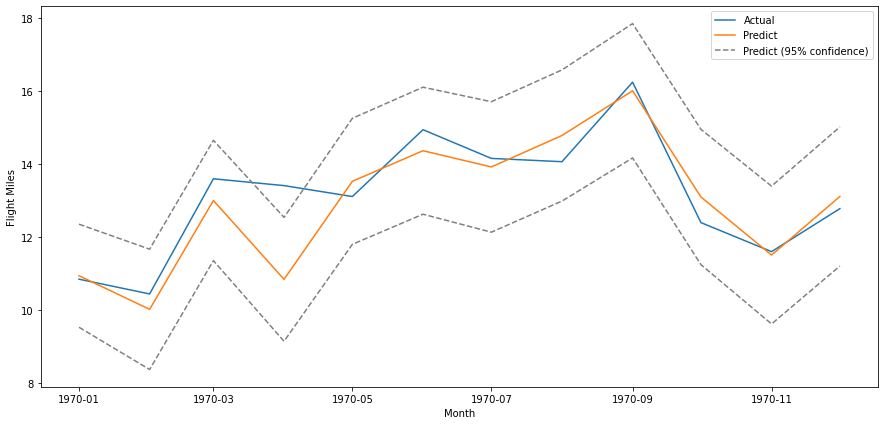

In [164]:
# Use the model parameters determined in Q7: Apply SARIMA(2, 1, 3)(1, 1, 0) model to this data. 
best_model = SARIMAX(p1_df_6y, order = (2,1,3), seasonal_order = (1,1,0,12))
best_model_fit = best_model.fit()

# Forecast for the 7th year using the best model we got from Q7.
best_model_predict = best_model_fit.get_forecast(12) 

# Extract actual values of the 7th year
actual = p1_df['Miles, in Millions'].iloc[72:]

# Compare the forecast with actual values by calculating MSE. 
mse = mean_squared_error(actual, best_model_predict.predicted_mean) 
print('MSE is ', mse)

# plot the actual and predict values to visually compare them
time = p1_df['Month']
plt.figure(figsize = (15,7))
actual, =plt.plot(time[72:],actual,label = 'Actual')
#plt.plot(time[72:],best_model_predict, label = 'Predict')
forecast, = plt.plot(time[72:],best_model_predict.predicted_mean, label = 'Predict')
lower, = plt.plot(time[72:],best_model_predict.conf_int().iloc[:,0], linestyle='dashed', color = 'gray')
upper, = plt.plot(time[72:],best_model_predict.conf_int().iloc[:,1], linestyle='dashed', color = 'gray')


plt.xlabel('Month')
plt.ylabel('Flight Miles')
plt.legend(handles = [actual,forecast,lower], labels = ['Actual', 'Predict', 'Predict (95% confidence)'])
plt.show()

Problem 2

(a) Plot the time series for TotalWine. What is the seasonal period for this time-series?

The seasonal period for this time-series is 4 time(quarter).

In [165]:
# import data for problem 2
wine_df = pd.read_csv('C:/Users/Joyce/Desktop/DSC 275/Project 1/TotalWine.csv')

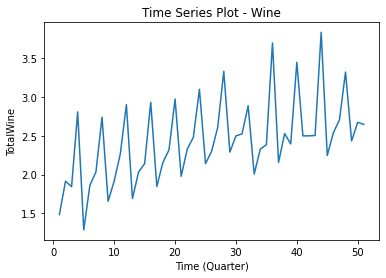

In [166]:
# draw the time series plot
plt.plot (wine_df['Time (Quarter)'], wine_df['TotalWine'])
plt.xlabel ('Time (Quarter)')
plt.ylabel ('TotalWine')
plt.title('Time Series Plot - Wine')
plt.show()

(b) Apply seasonal differencing to the original time-series. Vary the difference lag from 1, 2, 4, 6. Plot the result for each of these lags. Which of these differences is most suitable to remove the seasonality?	

Differencing lag = 4 is most suitable to remove the seasonality because we barely can see the seasonality from the plot when difference lag = 4. From other 3 plots, we can still see clear seasonality.

In [167]:
# wine_diff_no = diff(wine_df['TotalWine'])
# seasonal_wine_diff_no = wine_diff_no.shift(4) - wine_diff_no 
# print(seasonal_wine_diff_no)

# seasonal_wine_diff_yes = diff(wine_df['TotalWine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=4)
# print(seasonal_wine_diff_yes)

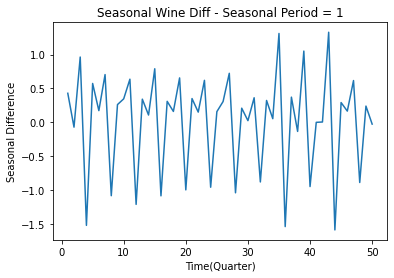

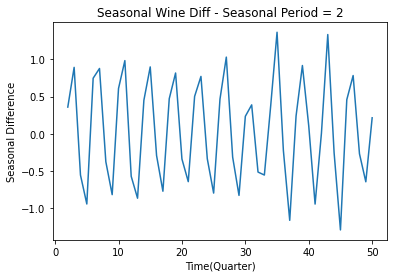

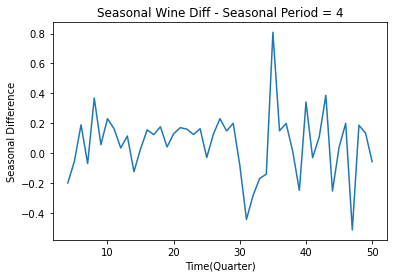

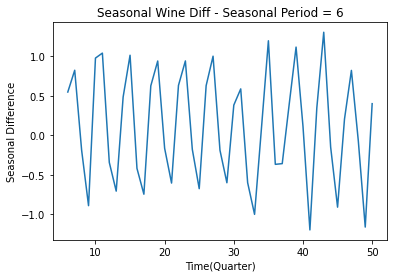

In [168]:
for period in (1,2,4,6):
    # apply seasonal differencing with difference lag = 1,2,4,6
    seasonal_wine_diff = diff(wine_df['TotalWine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=period)

    # Draw the seasonal differencing plot for each difference lag
    plt.plot(seasonal_wine_diff)
    plt.xlabel('Time(Quarter)')
    plt.ylabel('Seasonal Difference')
    plt.title('Seasonal Wine Diff - Seasonal Period = {}'.format(period))
    plt.show()

(c) Compute and plot the Auto-correlation (ACF) function for the original time-series. What is the seasonal period you estimate from the ACF? 

From the AFC plot, the seasonal period I estimate for the ACF is 4 lags.

[ 1.          0.00981336  0.09418692 -0.02079117  0.8230856  -0.01459707
  0.03758512 -0.06608181  0.68555932 -0.05158531 -0.0205     -0.13186071
  0.55301224 -0.05533192 -0.05098654 -0.16658851  0.43247383 -0.08668489
 -0.09922711 -0.18956349  0.36057707 -0.12115055 -0.1329952  -0.23540279
  0.27197506 -0.14075334 -0.1481723  -0.25076684  0.20724364 -0.14985131
 -0.14016206 -0.25396157  0.17482009 -0.1590046  -0.15594347 -0.27055794
  0.08512343 -0.14183386 -0.140666   -0.21838452  0.03854688]


C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


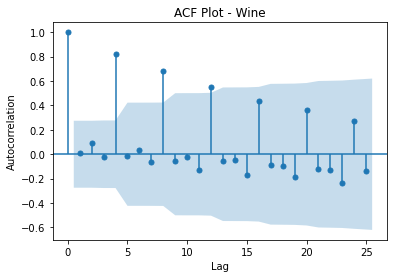

In [169]:
# compute ACF
wine_acf = acf(wine_df['TotalWine'])
print(wine_acf)

# Draw ACF Plot
st.plot_acf(wine_df['TotalWine'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - Wine')
plt.show()

(d) Define an AR model using tsa.AR available in statsmodels.api. Determine the optimal order using the “select_order” function. You will need to specify a maximum order p (recommend p=10) to consider and a criterion for deciding which model order is "best". [e.g. You can use AIC as the model selection criteria]

In [170]:
from statsmodels.api import tsa
#from statsmodels.tsa.ar_model import AR
# compute first seasonal difference with seasonal period = 4, which is the best difference lag we got from (b)
best_seasonal_wine_diff = diff(wine_df['TotalWine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=4)
ar = tsa.AR(best_seasonal_wine_diff) # define an AR model using the best diff
result = ar.select_order(maxlag=10, ic="aic") # use select_order to find the optimal order
print('The optimal order is ', result)

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


The optimal order is  5


(e) Now, evaluate an AR(p) model for the time-series generated after seasonal differencing (using the best lag you found in part b above). 


i.	use the fit method specifying the optimal lag found above

In [171]:
ar_best = tsa.AR(best_seasonal_wine_diff)
ar_fit = ar_best.fit(maxlag = 5)

ii.use the predict method to generate values starting at the optimal lag

In [172]:
# generate predict values starting from the optimal lag = 5
prediction = ar_fit.predict(start = 5)
# stop at 50 in order to correspond with actual values
prediction = prediction[0:42]

iii. plot the predicted results and the corresponding seasonally differenced time-series

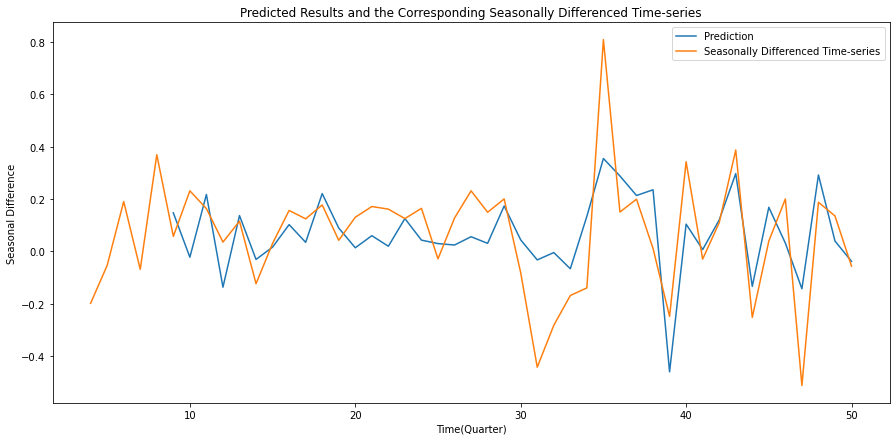

In [173]:
plt.figure(figsize = (15,7))
plt.plot(prediction,label = 'Prediction') # plot the predict values
plt.plot(best_seasonal_wine_diff, label = 'Seasonally Differenced Time-series') # plot actual values
plt.title('Predicted Results and the Corresponding Seasonally Differenced Time-series')
plt.xlabel('Time(Quarter)')
plt.ylabel('Seasonal Difference')
plt.legend()
plt.show()

iv.	Calculate the Mean Absolute Error (MAE) by comparing the predicted results with the seasonally differenced data.

In [174]:
mae = mean_absolute_error(best_seasonal_wine_diff[5:], prediction) # calculate MAE. Start from 5 to correspond with the length of the predict values
print('MAE is ', mae) # report MAE

MAE is  0.13139640993766555
